### Работу выполнила студтка группы 3822М1ПМкн1 Журилова Анастасия

In [19]:
 # Массивы (матрицы, векторы, линейная алгебра)
import numpy as np

# Научная графика
import matplotlib.pyplot as plt

# Таблицы и времные ряды (dataframe, series)
import pandas as pd

 # Еще больше красивой графики для визуализации данных
import seaborn as sns

 # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
%matplotlib inline

### 0. Описание задачи (постановка задачи)

 На протяжии некоторого времи глобальная финансовая компания собирала основные банковские реквизиты своих клитов. Накопив некоторое количество информации, компания смогла составить кредитные истории каждого клита. Руководство компании хочет создать интеллектуальную систему для разделия людей по группам кредитных баллов, чтобы сократить ручные усилия сотрудников.

 Необходимо произвести обработку данных в этой глобальной финансовой компании.

Т.е. цель классификации состоит в том, чтобы определить, к какому классу клинетов (признак: Credit_Score) относится тот или иной клит компании (Poor, Standard, Good). Набор данных содержит обучающие и тестовые данные.

### 1. Чтение данные

Выведем таблицу с данным и проанализируем имеющиеся признаки.

In [20]:
credit_data = pd.read_csv('./data/train.csv')

C:\Temp\ipykernel_9556\1574723364.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_data = pd.read_csv('./data/train.csv')


Посмотрим размер таблицы:

In [21]:
credit_data.shape

(100000, 28)

Количество строк (каждая строка соответствует одному клинету) 100 000, и количество столбцов (каждый столбец соответствует конкретному признаку) 28.

Таблица содержит данные о 100 тысяч клинетов компании. У каждого клинета есть ряд признаков: имя, возраст, id, вид занятости, годовой доход и т.д.

Посмотрим теперь на таблицу (для наглядности представлия данных).

In [22]:
credit_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


Таким образом, объем данных N = 100 000, признаков d = 28, классов K = 3 (признак: Credit_Score).

Теперь рассморим все колонки = признаки.

In [23]:
credit_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Всего имеется 28 признаков:
* **ID** - идтификатор записи в данных (например, с каждого клита собраны данные за несколько месяцев, каждый месяц - новая запись, следовательно, новый номер);
* **Customer_ID** - идтификатор самого клита в базе данных;
* **Month** - месяц записи о клите;
* **Name** - имя клита;
* **Age** - возраст клита;
* **SSN** - номер социального страхования человека (уникальный девятизначный номер, присваиваемый гражданам и резидтам США);
* **Occupation** - вид занятости (работа, должность, специальность);
* **Annual_Income** - годовой доход человека;
* **Monthly_Inhand_Salary** - заработная плата клита в месяц;
* **Num_Bank_Accounts** - количество банковских счетов, которыми владеет клит;
* **Num_Credit_Card** - количество других кредитных карт у клита (т.е. есть у клита еще кредитки, кроме той, по которой собирается информация здесь);
* **Interest_Rate** - процтная ставка по кредитной карте;
* **Num_of_Loan** - количесвто кредитов, взятых в банке клитом;
* **Type_of_Loan** - виды займов, взятых клитом в банке (например, у клита: Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan);
* **Delay_from_due_date** - среднее количество дней задержки с даты платежа;
* **Num_of_Delayed_Payment** - среднее количество платежей, задержанных клитом;
* **Changed_Credit_Limit** -  процтное измие лимита кредитной карты;
* **Num_Credit_Inquiries** - количество запросов по кредитной карте клитом;
* **Credit_Mix** - классификацию сочетания кредитов (Standard, Good, Bad);
* **Outstanding_Debt** - оставшийся долг, подлежащий выплате (в долларах США);
* **Credit_Utilization_Ratio** - коэффицит использования кредитной карты;
* **Credit_History_Age** - возраст кредитной истории лица (сколько лет используется кредитный счёт);
* **Payment_of_Min_Amount** - была ли выплача лицом только минимальная сумма (Yes, No, NM);
* **Total_EMI_per_month** - ежемесячные платежи EMI (в долларах США, электронные дьги, которые хранятся в электронном виде на электронном носителе);
* **Amount_invested_monthly** - ежемесячая сумма, инвестированная клитом (в долларах США);
* **Payment_Behaviour** - платежное поведие клита (в долларах США, например, High_spent_Small_value_payments);
* **Monthly_Balance** - ежемесячная сумма баланса клита (в долларах США);
* **Credit_Score** - кредитный рейтинг (Poor, Standard, Good).

Выведем тип данных всех столбцов, представлных в таблице:

In [24]:
credit_data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

Видим, что 20 признаков имеют тип данных "Object", это признаки которые требуют предобработки. 


Признаки ID, Customer_ID являются типом OBject, однако, гораздо удобнее перевести эти признаки в числовые. 
При переводе можно реализовать перевод номеров из шестнадцатиричной системы в десятичную (что и сделаем):

In [25]:
#приводим id из шестнадцатиричного вида в десятичный
credit_data['ID'] = credit_data.ID.apply(lambda x: int(x, 16))
credit_data['Customer_ID'] = credit_data.Customer_ID.apply(lambda x: int(x[4:], 16))

Рассмотрим получный результат:

In [26]:
credit_data["ID"], credit_data["Customer_ID"]

(0          5634
 1          5635
 2          5636
 3          5637
 4          5638
           ...  
 99995    155625
 99996    155626
 99997    155627
 99998    155628
 99999    155629
 Name: ID, Length: 100000, dtype: int64,
 0         3392
 1         3392
 2         3392
 3         3392
 4         3392
          ...  
 99995    37932
 99996    37932
 99997    37932
 99998    37932
 99999    37932
 Name: Customer_ID, Length: 100000, dtype: int64)

Теперь рассмотрим признаки **Name**, **Month**. Переведем их в специальный тип, предназначный для храния категориальных признаков:

In [27]:
credit_data["Month"] = credit_data["Month"].astype("category")
credit_data["Name"] = credit_data["Name"].astype("category")

Рассмотрим получный результат:

In [28]:
credit_data["Month"], credit_data["Name"]

(0         January
 1        February
 2           March
 3           April
 4             May
            ...   
 99995       April
 99996         May
 99997        June
 99998        July
 99999      August
 Name: Month, Length: 100000, dtype: category
 Categories (8, object): ['April', 'August', 'February', 'January', 'July', 'June', 'March', 'May'],
 0        Aaron Maashoh
 1        Aaron Maashoh
 2        Aaron Maashoh
 3        Aaron Maashoh
 4        Aaron Maashoh
              ...      
 99995            Nicks
 99996            Nicks
 99997            Nicks
 99998            Nicks
 99999            Nicks
 Name: Name, Length: 100000, dtype: category
 Categories (10139, object): [' Mattr', ' Mattx', ' Stevei', ' Stevep', ..., 'ty', 'yi', 'yk', 'yv'])

Особое внимание следует уделить признаку **Age**, так как он обладает рядом проблем:
* некоторые значия заканчиваются на нижнее подчеркивание (наприме, 28_);
* необходимо проверить признак на допустимые пределы (т.е. от 1 до 100, можно ужесточить рамки, но для простоты оставим такой промежуток);


Исправляем нижнее подчеркивание:

In [29]:
# исправляем нижнее подчеркивание
def AgeUnderscore(row):
    lenStr = len(row.Age)
    if((issubclass(type(row.Age), str)) and (row.Age[lenStr-1] == '_')):
        age = int(row.Age[:lenStr-1])
        return age
    else:
        age = int(row.Age[:lenStr])
        return age
        
credit_data['Age'] = credit_data.apply(AgeUnderscore,axis=1)
credit_data['Age']

0         23
1         23
2       -500
3         23
4         23
        ... 
99995     25
99996     25
99997     25
99998     25
99999     25
Name: Age, Length: 100000, dtype: int64

Исправляем выход за пределы допустимого возраста;

In [30]:
#исправляем выход за пределы допустимого возраста
def AgeLimit(row):
    if((row.Age >100) or (row.Age < 0)):
        return None
    else:
        return row.Age

credit_data['Age'] = credit_data.apply(AgeLimit,axis=1)
credit_data['Age']

0        23.0
1        23.0
2         NaN
3        23.0
4        23.0
         ... 
99995    25.0
99996    25.0
99997    25.0
99998    25.0
99999    25.0
Name: Age, Length: 100000, dtype: float64

Т.к. мы замили значия, выходящие за границы допустимого на Nan, пришлось признак **Age** перевести не в int, а в float.

В значия признака **SNN** встречаются недопустимые значия, исключим их и переведем признак в категориальный тип:

In [31]:
# исключим #F%$D@*&8 значия
def SSN(row):
    if(row.SSN == '#F%$D@*&8'):
        return None
    else:
        return row.SSN

credit_data['SSN']=credit_data.apply(SSN,axis=1)
credit_data["SSN"] = credit_data["SSN"].astype("category")
credit_data["SSN"]

0        821-00-0265
1        821-00-0265
2        821-00-0265
3        821-00-0265
4        821-00-0265
            ...     
99995    078-73-5990
99996    078-73-5990
99997    078-73-5990
99998    078-73-5990
99999    078-73-5990
Name: SSN, Length: 100000, dtype: category
Categories (12500, object): ['000-08-1349', '000-40-3312', '000-58-0568', '000-60-0688', ..., '999-84-9578', '999-92-7186', '999-95-7259', '999-99-3421']

У признака **Ocupation** встречаются недопустимые значия, исключим их и переведем признак в категориальный тип:

In [32]:
#исключим ____________ значия
def Oc(row):
    if(row.Occupation == '_______'):
        return None
    else:
        return row.Occupation

credit_data["Occupation"]=credit_data.apply(Oc,axis=1)
credit_data["Occupation"] = credit_data["Occupation"].astype("category")
credit_data["Occupation"]

0        Scientist
1        Scientist
2        Scientist
3        Scientist
4        Scientist
           ...    
99995     Mechanic
99996     Mechanic
99997     Mechanic
99998     Mechanic
99999     Mechanic
Name: Occupation, Length: 100000, dtype: category
Categories (15, object): ['Accountant', 'Architect', 'Developer', 'Doctor', ..., 'Musician', 'Scientist', 'Teacher', 'Writer']

Нижнее подчеркивание так же имеют данные признака **Annual_Income**, поэтому с ним повторяем действия, схожие с признаком **Age**:

In [33]:
#исключаем _
def AnnualIncomeUnderscore(row):
    x = len(row.Annual_Income)
    if((issubclass(type(row.Annual_Income), str)) and (row.Annual_Income[x-1] == '_')):
        ai = row.Annual_Income[:x-1]
        return ai
    elif(issubclass(type(row.Annual_Income), str)):
        ai = row.Annual_Income[:x]
        return ai
    else:
        ai = row.Annual_Income
        return ai

credit_data["Annual_Income"] = credit_data.apply(AnnualIncomeUnderscore,axis=1)
credit_data["Annual_Income"] = credit_data["Annual_Income"].astype(float)
credit_data["Annual_Income"]

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 100000, dtype: float64

Признак **Monthly_Inhand_Salary** предобработки не требует.

In [34]:
credit_data["Monthly_Inhand_Salary"]

0        1824.843333
1                NaN
2                NaN
3                NaN
4        1824.843333
            ...     
99995    3359.415833
99996    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: Monthly_Inhand_Salary, Length: 100000, dtype: float64

Признаки **Num_Bank_Accounts**, **Num_Credit_Card**, **Interest_Rate** требуют проверку на допумтимые значия (т.е. значия должны быть больше 0).
Тоже самое и для призкака **Num_of_Loan**, однако его сначала нужно перевести в числовой тип.

In [35]:
#Num_Bank_Accounts, у клита может быть 0 счетов или неогранично много (официального ограничия нет), но невозможны отрицательные значия
def NBA(row):
    if(row.Num_Bank_Accounts < 0 ):
        return None
    else:
        return row.Num_Bank_Accounts

credit_data["Num_Bank_Accounts"]=credit_data.apply(NBA,axis=1)
credit_data["Num_Bank_Accounts"]

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    4.0
99996    4.0
99997    4.0
99998    4.0
99999    4.0
Name: Num_Bank_Accounts, Length: 100000, dtype: float64

C **Num_Credit_Card** поступаем аналогично:

In [36]:
#Num_Credit_Card, у клита может быть 0 кредитных карт или неогранично много (официального ограничия нет), но невозможны отрицательные значия
def NCC(row):
    if(row.Num_Credit_Card < 0 ):
        return None
    else:
        return row.Num_Credit_Card

credit_data["Num_Credit_Card"]=credit_data.apply(NCC,axis=1)
credit_data["Num_Credit_Card"]

0        4
1        4
2        4
3        4
4        4
        ..
99995    6
99996    6
99997    6
99998    6
99999    6
Name: Num_Credit_Card, Length: 100000, dtype: int64

Теперь проведем обработку признака **Interest_Rate**: т.к. этот признак отвечает за процтную ставку по кредитной карте, то примем, что значия могут находится в диапазоне от 0 до 100%.

In [37]:
#Interest_Rate, проверим на невозможные значия
def IR(row):
    if((row.Interest_Rate < 0) or (row.Interest_Rate > 100 )):
        return None
    else:
        return row.Interest_Rate

credit_data["Interest_Rate"]=credit_data.apply(IR,axis=1)
credit_data["Interest_Rate"]

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    7.0
99996    7.0
99997    NaN
99998    7.0
99999    7.0
Name: Interest_Rate, Length: 100000, dtype: float64

Теперь займемся **Num_of_Loan**: он содержит в себе те же проблемы, что и признак **Age**, следовательно, его нужно обрабатывать похожим образом.

In [38]:
#обработка _
def NOLUnderscore(row):
    x = len(row.Num_of_Loan)
    if((issubclass(type(row.Num_of_Loan), str)) and (row.Num_of_Loan[x-1] == '_')):
        nol = int(row.Num_of_Loan[:x-1])
        return nol
    else:
        nol = int(row.Num_of_Loan[:x])
        return nol

#проверка на допустимые значия
def NOL(row):
    if(row.Num_of_Loan < 0 ):
        return None
    else:
        return row.Num_of_Loan
       
credit_data['Num_of_Loan'] = credit_data.apply(NOLUnderscore,axis=1)
credit_data["Num_of_Loan"]=credit_data.apply(NOL,axis=1)
credit_data["Num_of_Loan"]

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    2.0
99996    2.0
99997    2.0
99998    2.0
99999    2.0
Name: Num_of_Loan, Length: 100000, dtype: float64

Признак **Type_Of_Loan** переводим в категориальный:

In [39]:
"""
#произведем заму строки перечислия кредитов на лист из их названий
def TOLList(row):
    list_of_loans = []
    loan_str = row.Type_of_Loan.replace('and','').split(',')
    for x in loan_str:
        list_of_loans.append(x.strip())
    return list_of_loans

credit_data['Type_of_Loan'] = credit_data.apply(TOLList, axis=1) 
"""
credit_data['Type_of_Loan'].replace([np.NaN], None, inplace=True)
credit_data["Type_of_Loan"]=credit_data["Type_of_Loan"].astype("category")
credit_data["Type_of_Loan"]

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
99998                          Auto Loan, and Student Loan
99999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 100000, dtype: category
Categories (6260, object): ['Auto Loan', 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, C..., 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, S..., 'Auto Loan, Auto Loan, Auto Loan, Credit-Build..., ..., 'Student Loan, and Not Specified', 'Student Loan, and Payday Loan', 'Student Loan, and Personal Loan

Признак **Delay_from_due_date** уже в нужном типе, но нужно проверить его на допумтиимые значия:

In [40]:
#Delay_from_due_date, невозможны отрицательные значия
def DFDD(row):
    if(row.Delay_from_due_date < 0 ):
        return None
    else:
        return row.Delay_from_due_date

credit_data["Delay_from_due_date"]=credit_data.apply(DFDD,axis=1)
credit_data["Delay_from_due_date"]

0         3.0
1         NaN
2         3.0
3         5.0
4         6.0
         ... 
99995    23.0
99996    18.0
99997    27.0
99998    20.0
99999    18.0
Name: Delay_from_due_date, Length: 100000, dtype: float64

Признаки **Num_of_Delayed_Payment**, **Changed_Credit_Limit**  необходимо перевести из типа object  в типы числовые, проверив на недопустимые значия.

Пусть отрицательные значия в **Num_of_Delayed_Payment** означают, что клит уплатит вперед (т.е. нет задолжности):

In [41]:
#обработка _
from cmath import nan
def NODPUnderscore(row):    
    if (issubclass(type(row.Num_of_Delayed_Payment), str)):
        x = len(row.Num_of_Delayed_Payment)
        if (row.Num_of_Delayed_Payment[x-1] == '_'):
            nodp = int(row.Num_of_Delayed_Payment[:x-1])
            return nodp
        else:
            nodp = int(row.Num_of_Delayed_Payment[:x])
            return nodp
    else:
        return row.Num_of_Delayed_Payment    
   
credit_data["Num_of_Delayed_Payment"]=credit_data.apply(NODPUnderscore,axis=1)
credit_data["Num_of_Delayed_Payment"]

0        7.0
1        NaN
2        7.0
3        4.0
4        NaN
        ... 
99995    7.0
99996    7.0
99997    6.0
99998    NaN
99999    6.0
Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64

В признаке **Changed_Credit_Limit** необходимо обработать значие "_".

In [42]:
#обработка _
def CLUnderscore(row):
    if(row.Changed_Credit_Limit == '_'):
        return None
    else:
        return row.Changed_Credit_Limit

credit_data["Changed_Credit_Limit"]=credit_data.apply(CLUnderscore,axis=1)
credit_data["Changed_Credit_Limit"]=credit_data["Changed_Credit_Limit"].astype(float)
credit_data["Changed_Credit_Limit"]

0        11.27
1        11.27
2          NaN
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

Признак **Num_Credit_Inquiries** не нуждается в преобразованиях.

In [43]:
credit_data["Num_Credit_Inquiries"]

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    3.0
99996    3.0
99997    3.0
99998    3.0
99999    3.0
Name: Num_Credit_Inquiries, Length: 100000, dtype: float64

Признак **Credit_Mix** необходимо перевестив  категориальный. Признак **Outstanding_Debt** в числовой.

В значениях **Credit_Mix** есть '_', избавимся от них.

In [44]:
#обработка _
def CMUnderscore(row):
    if(row.Credit_Mix == '_'):
        return None
    else:
        return row.Credit_Mix

credit_data["Credit_Mix"] = credit_data.apply(CMUnderscore,axis=1)   
credit_data["Credit_Mix"] = credit_data["Credit_Mix"].astype("category")
credit_data["Credit_Mix"] 

0         NaN
1        Good
2        Good
3        Good
4        Good
         ... 
99995     NaN
99996     NaN
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, Length: 100000, dtype: category
Categories (3, object): ['Bad', 'Good', 'Standard']

У признака **Outstanding_Debt** некоторые значия заканчиваются на нижнее подчеркивание, исключим эти ситуации.

In [45]:
#обработка _
def ODUnderscore(row):
    if(type(row.Outstanding_Debt) == str):
        x = len(row.Outstanding_Debt)
        if(row.Outstanding_Debt[x-1] == '_'):
            odebt = row.Outstanding_Debt[:x-1]
            return odebt
        else:
            odebt = row.Outstanding_Debt[:x]
            return odebt
    else:
        return row.Outstanding_Debt

credit_data["Outstanding_Debt"] = credit_data.apply(ODUnderscore,axis=1)
credit_data["Outstanding_Debt"] = credit_data["Outstanding_Debt"].astype(float)
credit_data["Outstanding_Debt"]

0        809.98
1        809.98
2        809.98
3        809.98
4        809.98
          ...  
99995    502.38
99996    502.38
99997    502.38
99998    502.38
99999    502.38
Name: Outstanding_Debt, Length: 100000, dtype: float64

Признак **Credit_Utilization_Ratio** предобработки не требует.

In [46]:
credit_data["Credit_Utilization_Ratio"]

0        26.822620
1        31.944960
2        28.609352
3        31.377862
4        24.797347
           ...    
99995    34.663572
99996    40.565631
99997    41.255522
99998    33.638208
99999    34.192463
Name: Credit_Utilization_Ratio, Length: 100000, dtype: float64

Признак **Credit_History_Age** удобнее всего перевести в числовой. В данном случае признак будет говорить о количесве месяцев использования кредитной карты.

In [47]:
#Перевод строкового типа в числовой (кол-во месяцев)
def Month_Converter(x):
    if(type(x.Credit_History_Age) != float):
        if (x.Credit_History_Age != None):
            z = x.Credit_History_Age.split(' ')
            num1 = int(z[0])
            num2 = int(z[3])
            return (num1*12)+num2
        else:
            return x.Credit_History_Age
    else:
        return x.Credit_History_Age
        
credit_data["Credit_History_Age"] = credit_data.apply(Month_Converter,axis=1)
credit_data["Credit_History_Age"]

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

Признак **Payment_of_Min_Amount** переводим в бинарный тип, исключив значение "NM".

In [48]:
#Превратим Payment_of_Min_Amount в 1, если "Yes", в 0 если "No"
if type(credit_data["Payment_of_Min_Amount"].iloc[0]) == str:
    credit_data["Payment_of_Min_Amount"] = credit_data["Payment_of_Min_Amount"].apply(lambda x: 1 if x == "Yes" else (0 if x == "No" else None))

credit_data["Payment_of_Min_Amount"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: Payment_of_Min_Amount, Length: 100000, dtype: float64

Признак **Total_EMI_per_month** не требует предобработки.

In [49]:
credit_data["Total_EMI_per_month"]

0        49.574949
1        49.574949
2        49.574949
3        49.574949
4        49.574949
           ...    
99995    35.104023
99996    35.104023
99997    35.104023
99998    35.104023
99999    35.104023
Name: Total_EMI_per_month, Length: 100000, dtype: float64

Признак **Amount_invested_monthly** имеет недопустимые значения, исключим их.

In [50]:
# исключим неверные значения
def AIM(row):
    if(row.Amount_invested_monthly == '__10000__'):
        return None
    else:
        return row.Amount_invested_monthly

credit_data["Amount_invested_monthly"] = credit_data.apply(AIM,axis=1)
credit_data["Amount_invested_monthly"] = credit_data["Amount_invested_monthly"].astype(float)
credit_data["Amount_invested_monthly"]

0         80.415295
1        118.280222
2         81.699521
3        199.458074
4         41.420153
            ...    
99995     60.971333
99996     54.185950
99997     24.028477
99998    251.672582
99999    167.163865
Name: Amount_invested_monthly, Length: 100000, dtype: float64

Признак **Payment_Behaviour** имеет недопустимые значения, исключим их.

In [51]:
# исключим неверные значения
def PB(row):
    if(row.Payment_Behaviour == '!@9#%8'):
        return None
    else:
        return row.Payment_Behaviour

credit_data["Payment_Behaviour"] = credit_data.apply(PB,axis=1)
credit_data["Payment_Behaviour"] = credit_data["Payment_Behaviour"].astype("category")
credit_data["Payment_Behaviour"]

0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999                                 NaN
Name: Payment_Behaviour, Length: 100000, dtype: category
Categories (6, object): ['High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments']

Признак **Monthly_Balance** имеет недопустимые значения, исключим их. Так же переведем тип в числовой.

In [52]:
# исключим неверные значения
def MB(row):
    if(row.Monthly_Balance == '__-333333333333333333333333333__'):
        return None
    else:
        return row.Monthly_Balance

credit_data["Monthly_Balance"] = credit_data.apply(MB,axis=1)
credit_data["Monthly_Balance"] = credit_data["Monthly_Balance"].astype(float)
credit_data["Monthly_Balance"]

0        312.494089
1        284.629162
2        331.209863
3        223.451310
4        341.489231
            ...    
99995    479.866228
99996    496.651610
99997    516.809083
99998    319.164979
99999    393.673696
Name: Monthly_Balance, Length: 100000, dtype: float64

Последний признак, который мы и будем предсказывать **Credit_Score**, необходимо первестив категориальный тип.

In [53]:
def creditscore(row):
    if(row.Credit_Score == 'Poor'):
        return 0
    elif(row.Credit_Score == 'Standard'):
        return 1
    else:
        return 2

credit_data.Credit_Score = credit_data.apply(creditscore,axis=1)
credit_data["Credit_Score"]

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [54]:
credit_data.Credit_Score.value_counts()

1    53174
0    28998
2    17828
Name: Credit_Score, dtype: int64

Обработка признаков (чтение данных) завершено. Таким образом, мы получили следующие типы данных:

In [55]:
credit_data.dtypes

ID                             int64
Customer_ID                    int64
Month                       category
Name                        category
Age                          float64
SSN                         category
Occupation                  category
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts            float64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                  float64
Type_of_Loan                category
Delay_from_due_date          float64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                  category
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Credit_History_Age           float64
Payment_of_Min_Amount        float64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour           category
Monthly_Balance              float64
C

### 2. Визуализация данных и вычисление основных характеристик

Визуализация данных - это процесс преобразования больших наборов данных в статистическое и графическое представление. 

Следовательно, для начального анализа удобно этим заняться, сначала представить большой набор данных в упрощенном виде.


Получим визуализацию наших данных, а так же сводную информацию о количественных признаках.
Найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартилей, построим матрицу корреляции:

Получим сводку числовы значений в наборе данных. А именно: медиану, стандартное отклонение, минимальное значение, максимальное значение, 1-й квартиль, 2-й квартиль, 3-й квартиль столбцов с числовыми значениями. Он также подсчитывает количество переменных в наборе данных. 

Так же, мы сможем увидеть, есть ли пропущенные значения в столбцах.

In [56]:
credit_data.describe()

,ID,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,97224.000000,1.000000e+05,84998.000000,99979.000000,100000.00000,97988.000000,96124.000000,99409.000000,...,97909.000000,98035.000000,100000.000000,100000.000000,90970.000000,87993.000000,100000.000000,91216.000000,98791.000000,100000.00000
mean,80631.500000,25982.666640,33.323274,1.764157e+05,4194.170850,17.095080,22.47443,14.546679,7.163622,21.207245,...,10.389025,27.754251,1426.220376,32.285173,221.195405,0.594661,1403.118217,195.539456,402.551258,0.88830
std,43301.486619,14340.543051,10.778909,1.429618e+06,3183.686167,117.416871,129.05741,8.798523,60.314923,14.794693,...,6.789496,193.177339,1155.129026,5.116875,99.741364,0.490960,8306.041270,199.564527,213.925499,0.67512
min,5634.000000,1006.000000,14.000000,7.005930e+03,303.645417,0.000000,0.00000,1.000000,0.000000,0.000000,...,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000,0.007760,0.00000
25%,43132.750000,13664.500000,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,7.000000,2.000000,10.000000,...,5.320000,3.000000,566.072500,28.052567,144.000000,0.000000,30.306660,72.236692,270.106630,0.00000
50%,80631.500000,25777.000000,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,...,9.400000,6.000000,1166.155000,32.305784,219.000000,1.000000,69.249473,128.954538,336.731225,1.00000
75%,118130.250000,38385.000000,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,...,14.870000,9.000000,1945.962500,36.496663,302.000000,1.000000,161.224249,236.815814,470.262938,1.00000
max,155629.000000,50999.000000,100.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,100.000000,1496.000000,67.000000,...,36.970000,2597.000000,4998.070000,50.000000,404.000000,1.000000,82331.000000,1977.326102,1602.040519,2.00000


В таблице выше представлены только числовые признаки, посмотрим на категориальные:

In [57]:
credit_data.describe(include=['category'])

,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Payment_Behaviour
count,100000,90015,94428,92938,88592,79805,92400
unique,8,10139,12500,15,6260,3,6
top,April,Langep,000-08-1349,Lawyer,Not Specified,Standard,Low_spent_Small_value_payments
freq,12500,44,8,6575,1408,36479,25513


При рассмотрении данных таблиц, можно обратить внимание, что присутствует достаточное количество пропущенных значений (их обработка будет произведена в задании 3).

Учитывая данные таблицы, можно сделать несколько выводов: средний возраст клиентов банка 30-40 лет, что логично; в качестве клиентов банка представлены люди с разным уровнем дохода (от 7 000$ до 24 000 000$ в год), соответсвенно месячная зарплата имеет такой же разброс; большинсвто людей имеет 7 кредитных карт и 5 кредитов; к сожалению, количество людей, задолжавших платёж, составляет большиство; долг в $, как правило не превышает нескольких тысяч; коэффициент использования кредитной карты не превышает 50%; 75% пользователей являются обладателями кредтной карты на протяжении 25 лет; месячный баласн, инвестирование и трата электронных денег так же подчеркивают наличие клиентов разного уровня дохода; большинство пользователей оносятся в рейтингу "Standart".

Стоит обратить внимание на столбцы: **Num_Bank_Accounts**, **Num_Credit_Card**, **Num_of_Loan**, **Num_of_Delayed_Payment**, **Num_Credit_Inquiries** данные столбцы стоит проверить на выбросы. Так как максимальные и минимальные значения не вписываются в прикладную область задачи (например, 1798 разных аккаунтов в банках).	

#### 2.5 Проверка наличия выбросов и борьба с ними

Проверим **Num_Bank_Accounts**, **Num_Credit_Card**, **Num_of_Loan**, **Num_of_Delayed_Payment**, **Num_Credit_Inquiries** данные столбцы на наличие выбросов.

Возможно, это ошибки в данных. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется выбрасывать.

Для обнаружения выбросов найдем, например, квантили для признаков

Признак **Num_Bank_Accounts**:

In [58]:
credit_data["Num_Bank_Accounts"].quantile([.01,.05,.1,.5, .8, .9,.95, .985, .99,.995])

0.010       0.00
0.050       1.00
0.100       2.00
0.500       6.00
0.800       8.00
0.900       9.00
0.950      10.00
0.985      10.00
0.990     445.22
0.995    1096.00
Name: Num_Bank_Accounts, dtype: float64

Можно наблюдать, что **95%** пользователей имеют от **0** до **10** аккаунтов в банках (это значения квантилей, соответствующих уровням **0,01** и **0,985** соотвтетственно).

Признак **Num_Credit_Card**:

In [59]:
credit_data["Num_Credit_Card"].quantile([.005,.01,.05,.1,.5, .8, .9,.95, .97, .99,.995])

0.005       1.0
0.010       1.0
0.050       3.0
0.100       3.0
0.500       5.0
0.800       7.0
0.900       9.0
0.950      10.0
0.970      10.0
0.990     849.0
0.995    1177.0
Name: Num_Credit_Card, dtype: float64

Можно наблюдать, что **95%** пользователей имеют от **1** до **10** кредиток в банках (это значения квантилей, соответствующих уровням **0,005** и **0,97** соотвтетственно).

Признак **Num_of_Loan**:

In [60]:
credit_data["Num_of_Loan"].quantile([.005,.01,.05,.1,.5, .8, .9,.95,.99,.995, .9995])

0.0050       0.0
0.0100       0.0
0.0500       0.0
0.1000       0.0
0.5000       3.0
0.8000       6.0
0.9000       7.0
0.9500       8.0
0.9900       9.0
0.9950       9.0
0.9995    1353.0
Name: Num_of_Loan, dtype: float64

Можно наблюдать, что **99,95%** пользователей имеют от **0** до **9** кредитов в банках (это значения квантилей, соответствующих уровням **0,005** и **0,995** соотвтетственно).

Признак **Num_of_Delayed_Payment**:

In [61]:
credit_data["Num_of_Delayed_Payment"].quantile([.005,.01,.05,.1,.5, .8, .9,.95,.99,.995, .9995])

0.0050      -1.000
0.0100       0.000
0.0500       2.000
0.1000       4.000
0.5000      14.000
0.8000      19.000
0.9000      21.000
0.9500      24.000
0.9900      27.000
0.9950    1732.045
0.9995    4131.009
Name: Num_of_Delayed_Payment, dtype: float64

Можно наблюдать, что **99%** пользователей задержали от **0** до **27** платежей (это значения квантилей, соответствующих уровням **0,01** и **0,99** соотвтетственно). А **0,5%** даже уплотили вперед один платёж.

Признак **Num_Credit_Inquiries**:

In [62]:
credit_data["Num_Credit_Inquiries"].quantile([.005,.01,.05,.1,.5, .8, .9,.95, .98, .985, .99,.995, .9995])

0.0050       0.000
0.0100       0.000
0.0500       0.000
0.1000       1.000
0.5000       6.000
0.8000      10.000
0.9000      12.000
0.9500      13.000
0.9800      16.000
0.9850     298.490
0.9900    1109.280
0.9950    1820.000
0.9995    2514.983
Name: Num_Credit_Inquiries, dtype: float64

Можно наблюдать, что **99%** пользователей совершили от **0** до **16** запросов по кредитной карте(это значения квантилей, соответствующих уровням **0,005** и **0,98** соотвтетственно). 

Удалим все строки таблицы, в которых данные признаки выходят за пределы квантилей, между которыми не обнаружены выбросы.

In [63]:
credit_data_rows_to_drop = credit_data[
    (credit_data["Num_Bank_Accounts"] < credit_data["Num_Bank_Accounts"].quantile(0.005)) | (credit_data["Num_Bank_Accounts"] > credit_data["Num_Bank_Accounts"].quantile(0.985)) |
    (credit_data["Num_Credit_Card"] < credit_data["Num_Credit_Card"].quantile(0.005)) | (credit_data["Num_Credit_Card"] > credit_data["Num_Credit_Card"].quantile(0.97)) |
    (credit_data["Num_of_Loan"] < credit_data["Num_of_Loan"].quantile(0.005)) | (credit_data["Num_of_Loan"] > credit_data["Num_of_Loan"].quantile(0.995)) |
    (credit_data["Num_of_Delayed_Payment"] < credit_data["Num_of_Delayed_Payment"].quantile(0.01)) | (credit_data["Num_of_Delayed_Payment"] > credit_data["Num_of_Delayed_Payment"].quantile(0.99)) |
    (credit_data["Num_Credit_Inquiries"] < credit_data["Num_Credit_Inquiries"].quantile(0.005)) | (credit_data["Num_Credit_Inquiries"] > credit_data["Num_Credit_Inquiries"].quantile(0.98))].index

clean_credit_data = credit_data.drop(credit_data_rows_to_drop)
clean_credit_data.shape

(92653, 28)

Таким образом осталось из 100 тысяч, 92 653 объекта (т.е. клиентов банка).

Помотрим теперь снова на основные характеристики:

In [64]:
clean_credit_data.describe()

,ID,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,92653.000000,92653.000000,90076.000000,9.265300e+04,78726.000000,92633.000000,92653.000000,90763.000000,89035.000000,92116.000000,...,90713.000000,90814.000000,92653.000000,92653.000000,84272.000000,81535.000000,92653.000000,84547.000000,91533.000000,92653.000000
mean,80616.278782,25981.250947,33.308173,1.766188e+05,4193.089719,5.378882,5.532017,14.558025,3.535261,21.219310,...,10.404113,5.766038,1425.390476,32.281487,221.066333,0.596860,1410.215095,195.346118,402.351922,0.886901
std,43297.801732,14338.656852,10.779575,1.431610e+06,3179.548862,2.585947,2.059262,8.789909,2.444868,14.770317,...,6.790520,3.817203,1154.575793,5.118167,99.760106,0.490531,8328.129437,199.131406,213.474606,0.673570
min,5634.000000,1006.000000,14.000000,7.005930e+03,303.645417,0.000000,1.000000,1.000000,0.000000,0.000000,...,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000,0.007760,0.000000
25%,43091.000000,13654.000000,24.000000,1.945305e+04,1625.188333,3.000000,4.000000,7.000000,2.000000,10.000000,...,5.340000,3.000000,565.480000,28.047027,144.000000,0.000000,30.419540,72.220931,270.097978,0.000000
50%,80604.000000,25800.000000,33.000000,3.757861e+04,3093.153333,6.000000,5.000000,13.000000,3.000000,18.000000,...,9.420000,5.000000,1165.700000,32.296084,219.000000,1.000000,69.272824,128.907111,336.756690,1.000000
75%,118116.000000,38388.000000,42.000000,7.279092e+04,5961.637500,7.000000,7.000000,20.000000,5.000000,28.000000,...,14.910000,8.000000,1945.670000,36.499986,302.000000,1.000000,161.163199,236.500101,469.999977,1.000000
max,155629.000000,50999.000000,99.000000,2.419806e+07,15204.633333,10.000000,10.000000,100.000000,9.000000,67.000000,...,36.970000,16.000000,4998.070000,50.000000,404.000000,1.000000,82331.000000,1977.326102,1602.040519,2.000000


##### Работа с выбросами закончена, возвращаемся к визуализации.

Вычислим матрицу корреляции для количественных признаков:

In [65]:
corr_mat = clean_credit_data.corr()
corr_mat

,ID,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
ID,1.000000,0.002272,0.002178,0.000950,-0.005601,0.005757,-0.000734,0.005057,-0.008192,-0.003813,...,0.009944,0.001775,0.004151,-0.006571,-0.005007,-0.004611,-0.001239,-0.006007,0.000783,0.004147
Customer_ID,0.002272,1.000000,-0.001354,0.001446,0.010539,-0.000206,-0.003436,-0.004022,0.015128,0.005410,...,0.001123,0.000333,0.005142,-0.003140,-0.016047,0.004237,0.007696,0.010687,-0.003773,0.006361
Age,0.002178,-0.001354,1.000000,0.007120,0.086879,-0.188950,-0.146820,-0.213820,-0.211537,-0.170725,...,-0.157604,-0.251200,-0.200192,0.025398,0.234015,-0.267370,0.001529,0.055053,0.113473,0.159646
Annual_Income,0.000950,0.001446,0.007120,1.000000,0.031052,-0.008048,-0.001629,-0.007136,-0.005834,-0.009797,...,-0.000333,-0.009462,-0.004328,0.011708,-0.001488,-0.009721,-0.000519,0.020532,0.019976,0.007863
Monthly_Inhand_Salary,-0.005601,0.010539,0.086879,0.031052,1.000000,-0.280034,-0.217165,-0.298618,-0.254353,-0.248199,...,-0.173331,-0.279994,-0.270324,0.173256,0.273659,-0.306644,0.007560,0.623485,0.704076,0.209322
Num_Bank_Accounts,0.005757,-0.000206,-0.188950,-0.008048,-0.280034,1.000000,0.440846,0.577741,0.470581,0.554169,...,0.328940,0.517721,0.504860,-0.071914,-0.483016,0.581425,-0.005136,-0.179423,-0.294910,-0.386216
Num_Credit_Card,-0.000734,-0.003436,-0.146820,-0.001629,-0.217165,0.440846,1.000000,0.492180,0.418205,0.476658,...,0.251676,0.457952,0.489658,-0.054839,-0.416798,0.413167,-0.006414,-0.139338,-0.235389,-0.403522
Interest_Rate,0.005057,-0.004022,-0.213820,-0.007136,-0.298618,0.577741,0.492180,1.000000,0.554142,0.580736,...,0.363286,0.627844,0.624716,-0.076529,-0.573899,0.626656,-0.004538,-0.190616,-0.323090,-0.480395
Num_of_Loan,-0.008192,0.015128,-0.211537,-0.005834,-0.254353,0.470581,0.418205,0.554142,1.000000,0.498614,...,0.369547,0.564735,0.638480,-0.101114,-0.606550,0.516014,-0.000207,-0.163566,-0.433699,-0.356326
Delay_from_due_date,-0.003813,0.005410,-0.170725,-0.009797,-0.248199,0.554169,0.476658,0.580736,0.498614,1.000000,...,0.287935,0.536742,0.569927,-0.064911,-0.489376,0.500178,-0.004149,-0.158490,-0.277818,-0.427660


Так как количественных признаков много, для большей наглядности представим матрицу в графическом виде:

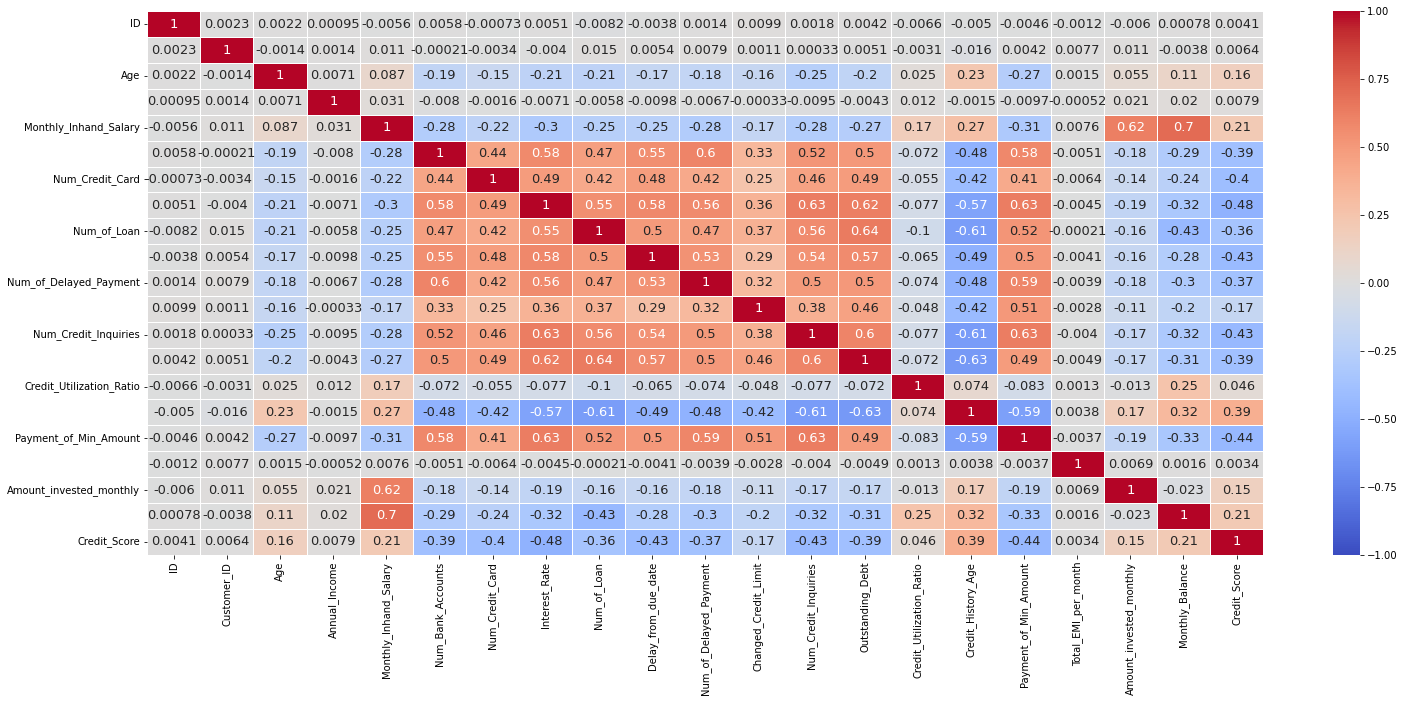

In [66]:
sns.heatmap(corr_mat , cmap='coolwarm', vmin=-1, vmax=1, annot=True, linewidths=1.0, annot_kws={"fontsize":13})

plt.gcf().set_size_inches(25, 10)

Признаки **ID** и **Customer_ID** некоррелируют ни с одним из признаков, что логично, потому что это просто индексы в системе. Признаки **Age** и **Annual_Income** тоже, что тоже логично, так как возраст человека не особенно влияет на его финансовое поведение, как и годовой доход человека не зависит от количества счетов, кредитов и т.д.

Признак **Monthly_Inhand_Salary** довольно сильно коррелирует с **Amount_Invested_monthly**  и **Monthly_Balance**, что означает, что от месячной зарплаты клиенты очень сильно зависят баланс клиента и его сумма, потраченная на инвестиции.

Количество банковских аккаунтов не сильно, но зависит от количества кредитных карт, процентной ставки, количества кредитов, количества задержанных платежей, выплаты минимальной суммы и количества запросов к кредитным картам (**Num_Bank_Accounts** и **Num_Credit_Card**, **Interest_Rate**, **Num_of_Loan**, **Delay_from_due_date**, **Changed_Credit_Limit**,  **Num_Credit_Inquiries**, **Outstanding_Debt**). Все признаки, перечисленные здесь коррелируют между друг другом довольно сильно, что логично, т.к. это характеристики непосредственного поведения клиента в финансовой компании (банке).

Заметим отрицательную корреляцию между признаками **Credit_History_Age** и **Num_Bank_Accounts**, что означает, что чем больше лет клиент держит счет, тем меньше он заводит банковских аккаунтов. Аналогичная ситуация так же с количеством кредитных карт и кредитов. Так же видимо, чем дольше клиент пользуется картой, тем меньше на ней процентная ставка.
Интересная корреляция наблюдается у признаков **Credit_History_Age** и **Delay_from_due_date**, **Num_of_Delayed_Payment**, **Outstanding_Debt**, **Payment_of_Min_Amount** получается, что скажем так, чем "старше" клиент, тем меньше у него возникает проблем, с тем что бы выплачивать задолженности.

В целом, зависимости вполне объяснимы и ожидаемы.

### 3.Обработка пропущенных значений

Пропущенные значения в таблице представлены значениями NaN. Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [67]:
clean_credit_data.isna().sum() 

ID                              0
Customer_ID                     0
Month                           0
Name                         9265
Age                          2577
SSN                          5150
Occupation                   6524
Annual_Income                   0
Monthly_Inhand_Salary       13927
Num_Bank_Accounts              20
Num_Credit_Card                 0
Interest_Rate                1890
Num_of_Loan                  3618
Type_of_Loan                10514
Delay_from_due_date           537
Num_of_Delayed_Payment       6566
Changed_Credit_Limit         1940
Num_Credit_Inquiries         1839
Credit_Mix                  18664
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8381
Payment_of_Min_Amount       11118
Total_EMI_per_month             0
Amount_invested_monthly      8106
Payment_Behaviour            7047
Monthly_Balance              1120
Credit_Score                    0
dtype: int64

В качестве обработки пропущенных значений заполним их медианой (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [68]:
clean_credit_data.fillna(clean_credit_data.median(axis = 0), axis=0 , inplace=True)

clean_credit_data.isna().sum() 

C:\Temp\ipykernel_9556\4293509444.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  clean_credit_data.fillna(clean_credit_data.median(axis = 0), axis=0 , inplace=True)


ID                              0
Customer_ID                     0
Month                           0
Name                         9265
Age                             0
SSN                          5150
Occupation                   6524
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10514
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  18664
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            7047
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [69]:
clean_credit_data['Name'].fillna(clean_credit_data['Name'].mode().iloc[0], inplace=True)
clean_credit_data['SSN'].fillna(clean_credit_data['SSN'].mode().iloc[0], inplace=True)
clean_credit_data['Occupation'].fillna(clean_credit_data['Occupation'].mode().iloc[0], inplace=True)
clean_credit_data['Type_of_Loan'].fillna(clean_credit_data['Type_of_Loan'].mode().iloc[0], inplace=True)
clean_credit_data['Credit_Mix'].fillna(clean_credit_data['Credit_Mix'].mode().iloc[0], inplace=True)
clean_credit_data['Payment_Behaviour'].fillna(clean_credit_data['Payment_Behaviour'].mode().iloc[0], inplace=True)

clean_credit_data.isna().sum() 

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Все пропущенные значения обработаны, взглянем еще раз на основные характеристики:

In [70]:
clean_credit_data.describe()

,ID,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,92653.000000,92653.000000,92653.000000,9.265300e+04,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,...,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000
mean,80616.278782,25981.250947,33.299602,1.766188e+05,4027.754392,5.379016,5.532017,14.526243,3.514360,21.200652,...,10.383507,5.750834,1425.390476,32.281487,220.879421,0.645235,1410.215095,189.533521,401.559000,0.886901
std,43297.801732,14338.656852,10.628729,1.431610e+06,2957.099840,2.585684,2.059262,8.702582,2.398899,14.729479,...,6.720529,3.780641,1154.575793,5.118167,95.143036,0.478444,8328.129437,191.145238,212.301467,0.673570
min,5634.000000,1006.000000,14.000000,7.005930e+03,303.645417,0.000000,1.000000,1.000000,0.000000,0.000000,...,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000,0.007760,0.000000
25%,43091.000000,13654.000000,25.000000,1.945305e+04,1792.990833,3.000000,4.000000,8.000000,2.000000,10.000000,...,5.430000,3.000000,565.480000,28.047027,154.000000,0.000000,30.419540,76.980851,270.918433,0.000000
50%,80604.000000,25800.000000,33.000000,3.757861e+04,3093.153333,6.000000,5.000000,13.000000,3.000000,18.000000,...,9.420000,5.000000,1165.700000,32.296084,219.000000,1.000000,69.272824,128.907111,336.756690,1.000000
75%,118116.000000,38388.000000,41.000000,7.279092e+04,5379.470000,7.000000,7.000000,20.000000,5.000000,28.000000,...,14.700000,8.000000,1945.670000,36.499986,292.000000,1.000000,161.163199,219.656201,467.393908,1.000000
max,155629.000000,50999.000000,99.000000,2.419806e+07,15204.633333,10.000000,10.000000,100.000000,9.000000,67.000000,...,36.970000,16.000000,4998.070000,50.000000,404.000000,1.000000,82331.000000,1977.326102,1602.040519,2.000000


In [71]:
clean_credit_data.describe(include=['category'])

,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Payment_Behaviour
count,92653,92653,92653,92653,92653,92653,92653
unique,8,10137,12499,15,6260,3,6
top,January,Langep,000-86-6182,Lawyer,Not Specified,Standard,Low_spent_Small_value_payments
freq,11643,9307,5158,12619,11824,52726,30600


### 4.Обработка категориальных признаков

Для дальнейшей обработки данных закодируем категориальные признаки с помощью числовых.

Бинарные признаки **Payment_of_Min_Amount** заменим на числовой (0 и 1). К небинарным признакам **Month**, **Occupation**, **Type_of_Loan**, **Credit_Mix**, **Payment_Behaviour** применим метод бинаризации (one-hot encoding).

#### 4.5 Отбор признаков

Для предсказания кредитного рейтинга клиента будем использовать все входные признаки, кроме **Name** и **SNN**.

In [72]:
clean_credit_data = clean_credit_data.drop(["Name"], axis=1)
clean_credit_data = clean_credit_data.drop(["SSN"], axis=1)

clean_credit_data.head()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,January,23.0,Scientist,19114.12,1824.843333,3.0,4,3.0,...,Standard,809.98,26.822620,265.0,0.0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,5635,3392,February,23.0,Scientist,19114.12,3093.153333,3.0,4,3.0,...,Good,809.98,31.944960,219.0,0.0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2
2,5636,3392,March,33.0,Scientist,19114.12,3093.153333,3.0,4,3.0,...,Good,809.98,28.609352,267.0,0.0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2
3,5637,3392,April,23.0,Scientist,19114.12,3093.153333,3.0,4,3.0,...,Good,809.98,31.377862,268.0,0.0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2
4,5638,3392,May,23.0,Scientist,19114.12,1824.843333,3.0,4,3.0,...,Good,809.98,24.797347,269.0,0.0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2


In [73]:
clean_credit_data['Payment_of_Min_Amount'] = pd.factorize(clean_credit_data['Payment_of_Min_Amount'])[0]

Month_dummies = pd.get_dummies(clean_credit_data['Month'])
Occupation_dummies = pd.get_dummies(clean_credit_data['Occupation'])
Type_of_Loan_dummies = pd.get_dummies(clean_credit_data['Type_of_Loan'])
Credit_Mix_dummies = pd.get_dummies(clean_credit_data['Credit_Mix'])
Payment_Behaviour_dummies = pd.get_dummies(clean_credit_data['Payment_Behaviour'])

Month_dummies.head()

,April,August,February,January,July,June,March,May
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1


Добавим dummy-столбцы к таблице и удалим столбцы категориальных признаков:

In [74]:
clean_credit_data = pd.concat((clean_credit_data, Month_dummies), axis=1)
clean_credit_data = pd.concat((clean_credit_data, Occupation_dummies), axis=1)
clean_credit_data = pd.concat((clean_credit_data, Type_of_Loan_dummies), axis=1)
clean_credit_data = pd.concat((clean_credit_data, Credit_Mix_dummies), axis=1)
clean_credit_data = pd.concat((clean_credit_data, Payment_Behaviour_dummies), axis=1)

clean_credit_data = clean_credit_data.drop(['Month'], axis=1)
clean_credit_data = clean_credit_data.drop(['Occupation'], axis=1)
clean_credit_data = clean_credit_data.drop(['Type_of_Loan'], axis=1)
clean_credit_data = clean_credit_data.drop(['Credit_Mix'], axis=1)
clean_credit_data = clean_credit_data.drop(['Payment_Behaviour'], axis=1)

clean_credit_data.head()

,ID,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,"Student Loan, and Student Loan",Bad,Good,Standard,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,5634,3392,23.0,19114.12,1824.843333,3.0,4,3.0,4.0,3.0,...,0,0,0,1,0,0,1,0,0,0
1,5635,3392,23.0,19114.12,3093.153333,3.0,4,3.0,4.0,18.0,...,0,0,1,0,0,0,0,1,0,0
2,5636,3392,33.0,19114.12,3093.153333,3.0,4,3.0,4.0,3.0,...,0,0,1,0,0,0,0,0,1,0
3,5637,3392,23.0,19114.12,3093.153333,3.0,4,3.0,4.0,5.0,...,0,0,1,0,0,0,0,0,0,1
4,5638,3392,23.0,19114.12,1824.843333,3.0,4,3.0,4.0,6.0,...,0,0,1,0,0,1,0,0,0,0


### 5.Нормализация

Нормализация (normalization) и стандартизация (standardization) являются методами изменения диапазонов значений – шкалирования. Разные атрибуты могут измеряться в разных диапазонах, или значения одного атрибута варьируются слишком сильно. Например, один атрибут может имеет диапазон от 0 до 1, а второй — от 1 до 1000. Тогда второй атрибут оказывает большее влияние на обучение, хотя не факт, что он является более важным, чем первый.

Нормализация подразумевает изменение диапазонов в данных без изменения формы распределения,

Стандартизация изменяет форму распределения данных (приводится к нормальному распределению).

В дальнейшем мы будем использовать алгоритм k ближайших соседей, основанный на измерении расстояний, в таких случаях лучше применять стандартизацию. Выполним стандартизацию всех признаков:

In [78]:
credit_data_stand = (clean_credit_data - clean_credit_data.mean(axis = 0))/clean_credit_data.std(axis = 0)

credit_data_stand.head()


,ID,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,"Student Loan, and Student Loan",Bad,Good,Standard,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,-1.731780,-1.575409,-0.969034,-0.110019,-0.744957,-0.920072,-0.743964,-1.324462,0.202443,-1.235662,...,-0.045569,-0.483945,-0.563749,0.870199,-0.398404,-0.461643,2.789509,-0.341225,-0.401635,-0.702226
1,-1.731757,-1.575409,-0.969034,-0.110019,-0.316053,-0.920072,-0.743964,-1.324462,0.202443,-0.217296,...,-0.045569,-0.483945,1.773821,-1.149150,-0.398404,-0.461643,-0.358482,2.930587,-0.401635,-0.702226
2,-1.731734,-1.575409,-0.028188,-0.110019,-0.316053,-0.920072,-0.743964,-1.324462,0.202443,-1.235662,...,-0.045569,-0.483945,1.773821,-1.149150,-0.398404,-0.461643,-0.358482,-0.341225,2.489795,-0.702226
3,-1.731711,-1.575409,-0.969034,-0.110019,-0.316053,-0.920072,-0.743964,-1.324462,0.202443,-1.099880,...,-0.045569,-0.483945,1.773821,-1.149150,-0.398404,-0.461643,-0.358482,-0.341225,-0.401635,1.424027
4,-1.731688,-1.575409,-0.969034,-0.110019,-0.744957,-0.920072,-0.743964,-1.324462,0.202443,-1.031988,...,-0.045569,-0.483945,1.773821,-1.149150,-0.398404,2.166152,-0.358482,-0.341225,-0.401635,-0.702226


### 6.Разбиение данных на обучающую и тестовую выборку

Для определения кредитного рейтинга клиента будем использовать все входные признаки:

In [79]:
X = credit_data_stand.drop(["Credit_Score"], axis=1)

y = clean_credit_data["Credit_Score"]

X.head()

,ID,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,"Student Loan, and Student Loan",Bad,Good,Standard,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,-1.731780,-1.575409,-0.969034,-0.110019,-0.744957,-0.920072,-0.743964,-1.324462,0.202443,-1.235662,...,-0.045569,-0.483945,-0.563749,0.870199,-0.398404,-0.461643,2.789509,-0.341225,-0.401635,-0.702226
1,-1.731757,-1.575409,-0.969034,-0.110019,-0.316053,-0.920072,-0.743964,-1.324462,0.202443,-0.217296,...,-0.045569,-0.483945,1.773821,-1.149150,-0.398404,-0.461643,-0.358482,2.930587,-0.401635,-0.702226
2,-1.731734,-1.575409,-0.028188,-0.110019,-0.316053,-0.920072,-0.743964,-1.324462,0.202443,-1.235662,...,-0.045569,-0.483945,1.773821,-1.149150,-0.398404,-0.461643,-0.358482,-0.341225,2.489795,-0.702226
3,-1.731711,-1.575409,-0.969034,-0.110019,-0.316053,-0.920072,-0.743964,-1.324462,0.202443,-1.099880,...,-0.045569,-0.483945,1.773821,-1.149150,-0.398404,-0.461643,-0.358482,-0.341225,-0.401635,1.424027
4,-1.731688,-1.575409,-0.969034,-0.110019,-0.744957,-0.920072,-0.743964,-1.324462,0.202443,-1.031988,...,-0.045569,-0.483945,1.773821,-1.149150,-0.398404,2.166152,-0.358482,-0.341225,-0.401635,-0.702226


In [80]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Credit_Score, dtype: int64

Разобьем данные на обучающую и тестовую выборку в пропорции 3:1 (75% обучающей выборки, 25% - тестовой)

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train.shape, X_test.shape

((69489, 6312), (23164, 6312))

### 7.Классификатор ***k***-ближайших соседей

Проведем обучение с помощью k-nearest neighbors algorithm (k-NN) и вычислим ошибки на обучающей выборке и тестовой:

3 соседа:

In [82]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [83]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

5 соседей:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, p=1)
model.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

15 соседей:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15, p=1)
model.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

25 соседей:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=25, p=1)
model.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

50 соседей:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=50, p=1)
model.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

### 8.Вычисление ошибок на обучающей и тестовой выборках

Выпишем значения ошибок:

| Количество соседей | Ошибка на обучающей выборке | Ошибка на тестовой выборке |
| :----------------: | :--------------------------: | :------------------------: |
| 3 соседа | 0 | 0 |
| 5 соседей | 0 | 0 |
| 15 соседей | 0 | 0 |
| 25 соседей | 0 | 0 |
| 50 соседей | 0 | 0 |

### 12.Общие выводы

В результа данной работы, было реализовано обучение модели, предсказывающей кредитный рейтинг клиента крупной финансовой компании. Обучение проводилось с помощью метода k ближайших соседей.

В случае с методом k ближайших соседей, при подборе оптимальных параметров метода и предварительной обработки данных, был получен процент ошибок, указанных в пункте 8.

По данным ошибок можно сделать выводы: 


